Filipe Pierri de Mendonça Nobre - 118033026

In [19]:
using Plots

### 1.1

A questão nos pede para aproximar $\sqrt{10}$ por meio do Método da Bisseção, que é uma função que aproxima zeros de funções (ou seja, aproxima do ponto $f(x)=0$). Assim como fizemos na lista anterior para Método de Newton, temos que criar uma função que o valor de $x$ seja aproximadamente o valor de $\sqrt{10}$ quando $f(x)=0$. Então se temos uma raiz quadrada de 10, nada mais razoável que a função que utilizarmos seja $10 - x^{2}$. Como já dito, como estamos buscando o valor de um $x$ que terá o valor próximo de $\sqrt{10}$, isso significa que o erro será no domínio, e não no contradomínio. Me utilizei do código feito em aula como base para este exercício, com algumas alterações.


In [2]:
function bissecao(f,a,b,erro) 
  if (f(a)==0)  #verifica se a é raiz da equação
      return a
  end
  if (f(b)==0)  #verifica se b é raiz da equação
      return b
  end
  if !(f(a)*f(b) < 0)
      return "Não tem sinais opostos" #autoexplicativo
  end
  
  it = floor(log2((b-a)/(erro)))+1
    
  for i=1:it
      m=(a+b)/2

      if (f(m)==0) #verifica se m é raiz da equação
          return m
      end
      
      if (f(a)*f(m) < 0) #verifica se os sinais são opostos
          b=m
      else
          a=m
      end
  end
    
  x_final=(a+b)/2
  return x_final, it
end

bissecao (generic function with 1 method)

Temos que $\sqrt{10}$ é muito próximo de $3.1622776621952653$, e precisamos de $31$ passos para chegar neste resultado.

In [8]:
func(x)=(10-x^2)

bissecao(func,0,20,(10^(-8)))

(3.1622776621952653, 31.0)

### 1.2

Vou ser bem sincero, é difícil falar algo dessa questão que o próprio enunciado já não diga, mas tentarei. Estou reutilizando o código de Newton que fiz na semana passada...

In [4]:
function newton(f, df, x)
    
  fx = f(x)
  
  # Determinam o erro máximo da aproximação, o tempo máximo do programa executando e num máximo de iterações
  tempo_max = 25
  iteracoes_max = 500
  difmax = 10^(-14)
  
  # Checa se f(x) já está dentro da diferença esperada da aproximação
  if abs(fx) <= difmax
      return x, fx, :validado
  end
  
  k = 0
  t0 = time()
  dt = time() - t0 #calcular o tempo de execucao
  
  exitflag = :inconclusivo
  res = (abs(fx) <= difmax) # Se a aproximação já estiver nos conformes, marca res como true
  tempo_esgotado = (k >= iteracoes_max || dt >= tempo_max) #Checa se atingiu o limite de tempo ou iterações
  
  while !(res || tempo_esgotado)
      dfx = df(x) # Derivada
      
      if abs(dfx) <= difmax # Verifica se a derivada é nula
          exitflag = :derivada_nula
          break 
      end
      
      println("x: ", x, " f(x): ", fx)
      
      x = x - fx / dfx # Método de Newton
      fx = f(x)
      
      
      k += 1 # Iterações
      dt = time() - t0 # Tempo
      res = (abs(fx) <= difmax)
      tempo_esgotado = (k >= iteracoes_max || dt >= tempo_max)
      if tempo_esgotado
          exitflag = :tempo_esgotado
      end
      
  end
  
  if res
      exitflag = :validado
  end
  
  println("Número de iterações: ", k)
  return x, fx, exitflag
  
end

newton (generic function with 1 method)

Estarei usando o polinômio $x^5+x+3$ para essa questão.

In [5]:
g(x)=x^5+x+3
dg(x)=5*(x^4)+1

dg (generic function with 1 method)

Como havia modificado a versão feita em aula da função bisseção, onde agora ela retorna também o número de iterações feitas pelo método, tive de armazenar o último em outra variável para que conseguíssemos utilizar a raiz (com erro menor que $10^(-2)$) no Método de Newton.

In [6]:
function questão2(g,dg)
  x_final, it = bissecao(g, -100, 100, (10^(-2)))
  
  return newton(g, dg, x_final)
end

questão2 (generic function with 1 method)

In [7]:
questão2(g,dg)

x: -1.1322021484375 f(x): 0.007339838523050979
x: -1.1329985629418995 f(x): -9.212038352579555e-6
x: -1.1329975658866303 f(x): -1.4459544672718039e-11
Número de iterações: 3


(-1.1329975658850653, 0.0, :validado)

Devo dizer, o Método de Newton ser capaz de encontrar perfeitamente uma das raízes do polinômio que escolhi foi completamente acidental, não sabia que esse polinômio seria abençoado para esta questão. Verifiquei no Desmos e o resultado obtido pelos métodos está correto.

### 1.3

Vou resolver esta questão por meio do Método de Newton, logo irei "sequestrar" novamente o código que já utilizamos na Tarefa passada para isso, fazendo as devidas alterações para que ele rode por 20 iterações...

In [8]:
function newton1_3(f, df, x)
    
    fx = f(x)
    
    # Determinam o erro máximo da aproximação, o tempo máximo do programa executando e num máximo de iterações
    iteracoes_max = 20
    difmax = 10^(-15) # basicamente só existe para ver quando a derivada é nula agora, já que queremos 20 iteracoes
    
    # Checa se f(x) já está dentro da diferença esperada da aproximação
    if abs(fx) <= difmax
        return x, fx, :validado
    end
    
    k = 0
    
    exitflag = :inconclusivo
    res = (abs(fx) <= difmax) # Se a aproximação já estiver nos conformes, marca res como true
    iterando = (k >= iteracoes_max) #Checa se atingiu o limite de iterações
    
    while !(iterando)
        dfx = df(x) # Derivada
        
        if abs(dfx) <= difmax # Verifica se a derivada é nula
            exitflag = :derivada_nula
            break 
        end
        
        println("x: ", x, " f(x): ", fx)
        
        x = x - fx / dfx # Método de Newton
        fx = f(x)
        
        
        k += 1 # Iterações
        res = (abs(fx) <= difmax)
        iterando = (k >= iteracoes_max)
        if iterando
            exitflag = :iterando
        end
        
    end
    
    if res
        exitflag = :validado
    end
    
    println("Número de iterações: ", k)
    return x, fx, exitflag
    
end

newton1_3 (generic function with 1 method)

Para aproximarmos $\ln(3)$ com o Método de Newton, temos que elaborar uma saída para não utilizarmos a função $\ln(x)$. A função nos diz que sabemos todos calcular todos os valores de ${e}^{x}$, então podemos utilizar o valor de $e$. Isso nos ajuda bastante... Bem, agora é fazer a famosa inversão da função $\ln(x)$ para que um Método que encontra zero de funções possa nos ajudar. Show, sabendo das propriedades de ${e}^{x}$, podemos fazer ${e}^{x} - 3$ para encontrar o valor de $\ln(3)$ quando a função der $0$.

In [9]:
ln(x) = (((ℯ)^(x)) - 3)
dln(x) = ((ℯ)^(x))

da (generic function with 1 method)

Vamos utilizar um chute inicial $x=1$:

In [10]:
newton1_3(ln, dln, 1)

x: 1 f(x): -0.2817181715409549
x: 1.103638323514327 f(x): 0.015116059639309398
x: 1.0986248980473425 f(x): 3.7828376194148916e-5
x: 1.0986122887476075 f(x): 2.3849366925787763e-10
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
x: 1.0986122886681096 f(x): -4.440892098500626e-16
x: 1.0986122886681098 f(x): 4.440892098500626e-16
Número de it

(1.0986122886681096, -4.440892098500626e-16, :validado)

Algo a se notar é que as iterações logo apróxima a quarta, o erro basicamente não muda, ele apenas alterna o sinal em f(x). Isso não mudaria independente do número de iterações que ele fizesse (inclusive testei).

### 1.4

Primeiro, tive de implementar as funções de interpolação e verificação, já que não fizemos em aula, muito menos em listas passadas.

In [11]:
using LinearAlgebra

In [11]:
function interpola_vandermonde(pontos)
  dim = size(pontos)[2] 
  V = zeros(Float64, dim, dim)
  
  for l=1:dim #linhas
      x = 1 
      
      for c=1:dim #colunas
          V[l, c] = x #insere o valor de x
          x *= pontos[1, l] #multiplica x pela linha atual
      end
  end

  return V\pontos[2, :] #resolve o sistema
end

interpola_vandermonde (generic function with 1 method)

In [12]:
function avalia_polinomio(polinomio, x) #monta o polinômio e testa naquele ponto
  i = length(polinomio)
  valor = 0.0
  
  while i > 0
      valor *= x
      valor += polinomio[i]
      i -= 1
  end

  return valor
end

avalia_polinomio (generic function with 1 method)

Agora vamos para a questão em si. Ele pede para calcular o $cos(40)$ utilizando-se da tabela acima e interpolação polinomial. A ideia seria pegar os pontos que já possuímos: $30$, $45$ e $60$, que são os graus, passando como valores de x; $sqrt(3)/2$ $sqrt(2)/2$ $1/2$, que são os valores de $cos()$ nesses pontos, para y. Com isso, nós conseguimos um polinômio que dá um valor aproximado de $cos(x)$, e com isso avaliaremos o polinômio gerado no ponto $x=40$.

In [14]:
vandermonde = [
  30 45 60;
  sqrt(3)/2 sqrt(2)/2 1/2
]

polinomio = interpola_vandermonde(vandermonde)

println(avalia_polinomio(polinomio, 40))

0.7654338952290287


A aproximação não é tão precisa, mas 0.76 é aproximadamente o cosseno de 40 graus.

### 1.5

Essa questão foi mais chatinha de resolver. Vou explicar com todos os detalhes:

Primeiramente eu busquei passar os horários que tínhamos como $x$ para a função de interpolação, e as temperaturas registradas em $y$, para conseguir gerar um polinômio e verificar quando $f(x)=37$, mas olhe o que ocorreu...

In [16]:
vandermonde1 = [
  15 16.5 17.5;
  34 30 25
]

polinomio1 = interpola_vandermonde(vandermonde1)

a(x) = polinomio1[1] + polinomio1[2]*x + polinomio1[3]*(x^2)

a (generic function with 1 method)

Beleza, vamos plotar o gráfico para vizualizar onde está $f(x)=37$ que queremos tanto...

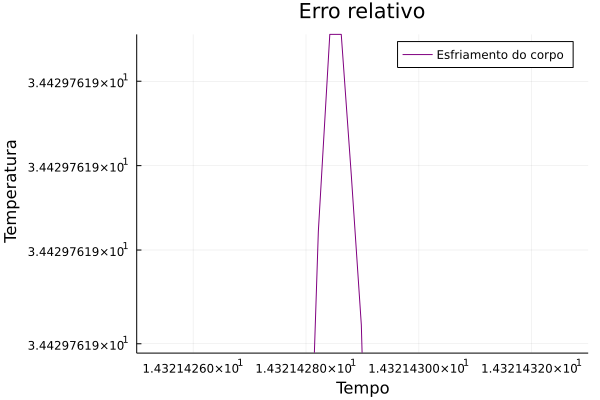

In [53]:
plot(a, xlim=(14.321425,14.321433), ylim=(34.42976190476175,34.4297619047619286), label = "Esfriamento do corpo", linecolor=:purple)
xlabel!("Tempo")
ylabel!("Temperatura")
title!("Erro relativo")

E ELE NÃO ATINGE 37?!? COMO, O CARA É UM ZUMBI? Ah claro, porque um polinômio de grau 2 iria ferrar a nossa vida nesse momento, já que antes de atingir $f(x)=37$, ele atinge seu ponto de máximo em 34.442(...) e volta a descer. Beleza, pensei em buscar fazer essa aproximação só utilizando dois pontos e fazendo uma aproximação com uma função linear. Escolhi as temperaturas entre 15 e 16:30 e meti bronca.

In [54]:
vandermonde2 = [
  15 16.5;
  34 30
]

polinomio2 = interpola_vandermonde(vandermonde2)

b(x) = polinomio2[1] + polinomio2[2]*x

b (generic function with 1 method)

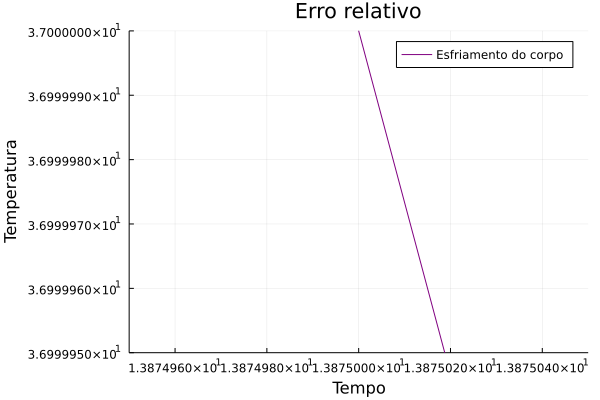

In [55]:
plot(b, xlim=(13.87495,13.87505), ylim=(36.99995,37), label = "Esfriamento do corpo", linecolor=:purple)
xlabel!("Tempo")
ylabel!("Temperatura")
title!("Erro relativo")

Com essa aproximação, ele nos diz que o nosso defunto morreu por volta da 13:52. Só que essa aproximação é mutíssimo imprecisa, já que ela é linear e ignora que a temperatura do indivíduo cai em ritmos diferente com o passar do tempo. Um brilhante aluno que não me recordo o nome, na aula de dúvidas da quarta feira, mencionou ter invertido os pontos: colocou a temperatura no eixo x e o horário no eixo y, assim conseguindo encontrar um valor mais razoável quando x = 37 pois o polinômio terá seu ponto de máximo em outro local. Parece razoável, então fiz aqui também.

In [61]:
vandermonde3 = [
  34 30 25;
  15 16.5 17.5
]

polinomio3 = interpola_vandermonde(vandermonde3)

c(x) = polinomio3[1] + polinomio3[2]*x + polinomio3[3]*(x^2)

c (generic function with 1 method)

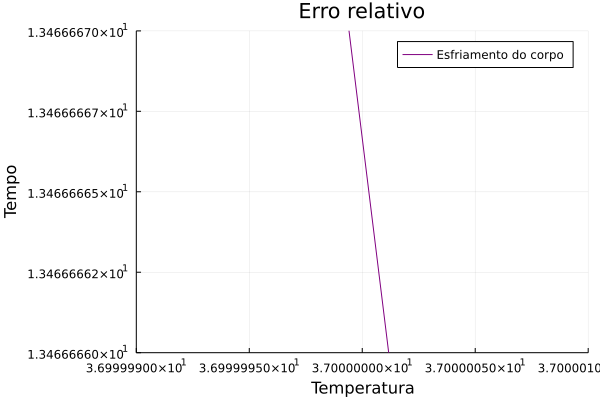

In [90]:
plot(c, xlim=(36.99999,37.00001), ylim=(13.466666,13.466667), label = "Esfriamento do corpo", linecolor=:purple)
xlabel!("Temperatura")
ylabel!("Tempo")
title!("Erro relativo")

Com essa aproximação, ele nos diz que o nosso defunto morreu por volta da 13:27. Ok, essa é de fato mais confiável para assumir que horas o sujeito foi assassinado. Mas ainda assim ela é tremendamente imperfeita: o resfriamento do corpo está ocorrendo devido a temperatura da sala, 20 graus, que não conseguimos incluir na nossa lógica de aproximação. Então fica a questão, seria razoável, com os métodos que nós conhecemos até o momento, calcular algo que contém diversos fatores que não conseguimos colocar em consideração? Eu poderia realmente confiar nessa aproximação? 

### 1.6